In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Training.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
df.drop('Unnamed: 133', axis=1, inplace=True)
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [4]:
x = df.drop('prognosis', axis = 1)
y = df['prognosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [5]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [6]:
pred = tree.predict(x_test)
acc = tree.score(x_test, y_test)

print("Acurray on test set: {:.2f}%".format(acc*100))

Acurray on test set: 100.00%


In [7]:
fi = pd.DataFrame(tree.feature_importances_*100, x_test.columns, columns=['Importance'])
fi.sort_values(by='Importance',ascending=False, inplace=True)
fi

,Importance
mild_fever,4.827496
sinus_pressure,2.645294
internal_itching,2.638602
hip_joint_pain,2.609205
enlarged_thyroid,2.586532
...,...
swollen_blood_vessels,0.000000
swollen_legs,0.000000
obesity,0.000000
skin_rash,0.000000


In [8]:
zeros = np.array(fi[fi['Importance'] <= 2.300000].index)
zeros

array(['nausea', 'yellowing_of_eyes', 'shivering', 'spotting_ urination',
       'patches_in_throat', 'receiving_blood_transfusion',
       'family_history', 'coma', 'ulcers_on_tongue', 'diarrhoea',
       'constipation', 'pus_filled_pimples', 'sweating', 'joint_pain',
       'breathlessness', 'nodal_skin_eruptions', 'watering_from_eyes',
       'toxic_look_(typhos)', 'vomiting', 'cough', 'dark_urine',
       'blackheads', 'stomach_pain', 'muscle_wasting', 'chest_pain',
       'pain_behind_the_eyes', 'weakness_of_one_body_side', 'headache',
       'dehydration', 'passage_of_gases', 'swelled_lymph_nodes',
       'blister', 'small_dents_in_nails', 'foul_smell_of urine',
       'visual_disturbances', 'dizziness', 'irritation_in_anus',
       'fatigue', 'abdominal_pain', 'red_spots_over_body',
       'burning_micturition', 'anxiety', 'irritability', 'weight_gain',
       'sunken_eyes', 'acidity', 'polyuria', 'mucoid_sputum',
       'receiving_unsterile_injections', 'bladder_discomfort',
  

In [9]:
training_new = df.drop(columns=zeros, axis=1)
training_new.shape[1]
training_new.columns

Index(['itching', 'weight_loss', 'back_pain', 'mild_fever', 'sinus_pressure',
       'neck_pain', 'enlarged_thyroid', 'slurred_speech', 'hip_joint_pain',
       'movement_stiffness', 'unsteadiness', 'continuous_feel_of_urine',
       'internal_itching', 'depression', 'muscle_pain', 'altered_sensorium',
       'belly_pain', 'abnormal_menstruation', 'dischromic _patches',
       'increased_appetite', 'rusty_sputum', 'lack_of_concentration',
       'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf',
       'silver_like_dusting', 'yellow_crust_ooze', 'prognosis'],
      dtype='object')

In [10]:
def modelling(df1):
    x_new = df1.drop('prognosis', axis = 1)
    y_new = df1.prognosis
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.3, random_state=42) 
    tree.fit(x_train_new, y_train_new)
    
    pred_new = tree.predict(x_test_new)
    #print(pred_new)
    acc_new = tree.score(x_test_new, y_test_new)
    #print(acc_new)
#     a = mean_absolute_error(y_test_new, pred_new)
    print("Acurray on test set: {:.2f}%".format(acc*100))
#     print("mean_absolute_error of the test set: {:.2f}%".format(a))

In [11]:
test = pd.read_csv("Testing.csv")
test_new = test.drop(columns=zeros, axis=1)
test_new.shape[1]
print(test_new)

    itching  weight_loss  back_pain  mild_fever  sinus_pressure  neck_pain  \
0         1            0          0           0               0          0   
1         0            0          0           0               0          0   
2         0            0          0           0               0          0   
3         1            0          0           0               0          0   
4         1            0          0           0               0          0   
5         0            0          0           0               0          0   
6         0            0          0           0               0          0   
7         0            1          0           0               0          0   
8         0            0          0           0               0          0   
9         0            0          0           0               0          0   
10        0            0          0           0               0          0   
11        0            0          0           0               0 

In [12]:
modelling(test_new)

Acurray on test set: 100.00%


In [13]:
import matplotlib.pyplot as plt

In [16]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth = 1, 
                             random_state = 0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

[Text(0.5, 0.75, 'X[54] <= 0.5\ngini = 0.976\nsamples = 3444\nvalue = [88, 81, 79, 84, 85, 84, 76, 88, 85, 90, 89, 80\n87, 75, 85, 92, 79, 80, 84, 74, 80, 85, 73, 89\n83, 78, 87, 85, 86, 90, 84, 92, 86, 93, 81, 88\n85, 86, 84, 83, 81]'),
 Text(0.25, 0.25, 'gini = 0.975\nsamples = 3355\nvalue = [88, 81, 79, 84, 85, 84, 76, 88, 85, 90, 0, 80\n87, 75, 85, 92, 79, 80, 84, 74, 80, 85, 73, 89\n83, 78, 87, 85, 86, 90, 84, 92, 86, 93, 81, 88\n85, 86, 84, 83, 81]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 89\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 89, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]')]

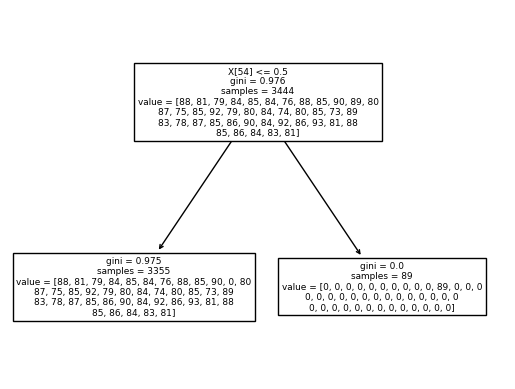

In [17]:
tree.plot_tree(clf)